In [13]:
from bs4 import BeautifulSoup as bs
import requests

In [14]:
url_link="https://www.meesho.com/k-footlance-mens-casual-shoes/p/6pts7v"
page=requests.get(url_link)
page
page.content
#extracted the total content present on the webpage ie the code for the webpage.

b'<!DOCTYPE html><html lang="en"><head><title>K- Footlance Mens Casual Shoes</title><meta name="description" content="Name: K- Footlance Mens Casual Shoes\nMaterial: Mesh\nSole Material: Rubber\nFastening &amp; Back Detail: Lace-Up\nSizes:\nIND-6, IND-7, IND-8, IND-9, IND-10\nK- Footlance Mens Casual Shoes Best Brand In Best Price\nCountry of Origin: India"/><meta property="keywords" content="meesho,reseller,products,reselling"/><meta property="twitter:creator" content="Meesho"/><meta property="twitter:title" content="K- Footlance Mens Casual Shoes"/><meta property="twitter:description" content="Name: K- Footlance Mens Casual Shoes\nMaterial: Mesh\nSole Material: Rubber\nFastening &amp; Back Detail: Lace-Up\nSizes:\nIND-6, IND-7, IND-8, IND-9, IND-10\nK- Footlance Mens Casual Shoes Best Brand In Best Price\nCountry of Origin: India"/><meta name="google-site-verification" content="EiBr3hKwYk-VNJuHPL7JVyg7exaUSOgsLYJvK2C6DJc"/><meta property="twitter:card" content="summary"/><meta proper

In [15]:
note_page_html= bs(page.content, 'html.parser')
print(note_page_html.prettify())
#this will give us the html code for that websidte or webage particularly

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   K- Footlance Mens Casual Shoes
  </title>
  <meta content="Name: K- Footlance Mens Casual Shoes
Material: Mesh
Sole Material: Rubber
Fastening &amp; Back Detail: Lace-Up
Sizes:
IND-6, IND-7, IND-8, IND-9, IND-10
K- Footlance Mens Casual Shoes Best Brand In Best Price
Country of Origin: India" name="description"/>
  <meta content="meesho,reseller,products,reselling" property="keywords"/>
  <meta content="Meesho" property="twitter:creator"/>
  <meta content="K- Footlance Mens Casual Shoes" property="twitter:title"/>
  <meta content="Name: K- Footlance Mens Casual Shoes
Material: Mesh
Sole Material: Rubber
Fastening &amp; Back Detail: Lace-Up
Sizes:
IND-6, IND-7, IND-8, IND-9, IND-10
K- Footlance Mens Casual Shoes Best Brand In Best Price
Country of Origin: India" property="twitter:description"/>
  <meta content="EiBr3hKwYk-VNJuHPL7JVyg7exaUSOgsLYJvK2C6DJc" name="google-site-verification"/>
  <meta content="summary" property="twitter:c

In [16]:
#Extracting the title of all the reviews
heading=note_page_html.find_all('span',class_="sc-eDvSVe gUjMRV Comment__CommentText-sc-1ju5q0e-3 cfdxfJ Comment__CommentText-sc-1ju5q0e-3 cfdxfJ")
heading

[<span class="sc-eDvSVe gUjMRV Comment__CommentText-sc-1ju5q0e-3 cfdxfJ Comment__CommentText-sc-1ju5q0e-3 cfdxfJ" color="greyBase" font-size="16px" font-weight="book">Mujhe yah pasand hai yah acchi hai for look main acchi bhi lagte💕👌🏾</span>,
 <span class="sc-eDvSVe gUjMRV Comment__CommentText-sc-1ju5q0e-3 cfdxfJ Comment__CommentText-sc-1ju5q0e-3 cfdxfJ" color="greyBase" font-size="16px" font-weight="book">নকল matariyal</span>]

In [17]:
review_title=[]
for i in range(0,len(heading)):
    review_title.append(heading[i].get_text())
review_title

['Mujhe yah pasand hai yah acchi hai for look main acchi bhi lagte💕👌🏾',
 'নকল matariyal']

In [19]:
review_title[:]=[title.strip('\n') for title in review_title]
print(review_title)
len(review_title)

['Mujhe yah pasand hai yah acchi hai for look main acchi bhi lagte💕👌🏾', 'নকল matariyal']


2

In [21]:
#scrap the ratings
rating = note_page_html.find_all('span',class_="sc-eDvSVe laVOtN")
rating

[<span class="sc-eDvSVe laVOtN" color="#ffffff" font-size="16px" font-weight="demi">3.6</span>,
 <span class="sc-eDvSVe laVOtN" color="#ffffff" font-size="16px" font-weight="demi">5.0</span>,
 <span class="sc-eDvSVe laVOtN" color="#ffffff" font-size="16px" font-weight="demi">3.0</span>]

In [26]:
rate=[]
for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
rate
rate.pop(0)
print(rate)
len(rate)

['5.0', '3.0']


2

In [27]:
#now we have to save the data in .csv file
import pandas as pd
df=pd.DataFrame()
df['index']=range(1,3)
df['Review_Title']=review_title
df['Rate']=rate
df

,index,Review_Title,Rate
0,1,Mujhe yah pasand hai yah acchi hai for look ma...,5.0
1,2,নকল matariyal,3.0


In [28]:
#sentiment analysis
import pandas as pd
from textblob import TextBlob

In [29]:
df['polarity']=df['Review_Title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['polarity']

0    0.166667
1    0.000000
Name: polarity, dtype: float64

In [30]:
df

,index,Review_Title,Rate,polarity
0,1,Mujhe yah pasand hai yah acchi hai for look ma...,5.0,0.166667
1,2,নকল matariyal,3.0,0.000000


<Axes: xlabel='Rate', ylabel='polarity'>

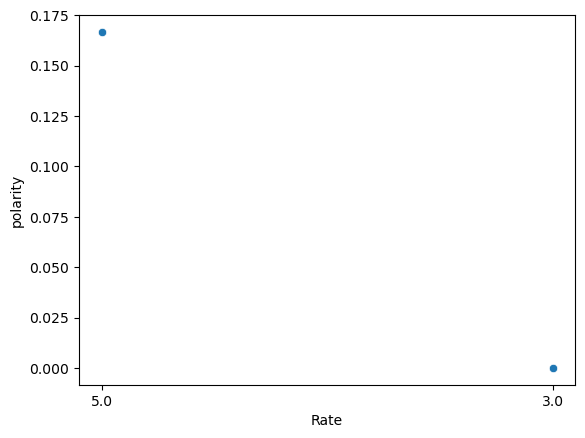

In [32]:
import seaborn as sns
sns.scatterplot(df,x='Rate',y='polarity')